In [80]:
import pandas as pd #for reading data
import numpy as np # for working with numerical functions
import matplotlib.pyplot as plt
import seaborn as sns
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv("D://Downloads//Technocolab//Preprocessed dataset.csv")
df.shape

(12707, 48)

In [82]:
df['RecoveryStage'].value_counts()

RecoveryStage
1.0    8128
2.0      13
Name: count, dtype: int64

In [83]:
code_mapping = {1.0: 'Collection', 2.0: 'Recovery'}
df['RecoveryStage']=df['RecoveryStage'].apply(lambda x: code_mapping.get(x, 'Unknown'))

In [84]:
df['RecoveryStage'].value_counts()

RecoveryStage
Collection    8128
Unknown       4566
Recovery        13
Name: count, dtype: int64

In [85]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

In [86]:
num_cols = num_cols.drop('defaulted')

In [87]:
df.isnull().sum().sum()

31189

In [88]:
for col in num_cols:  
        df[col].fillna(df[col].mean(), inplace=True)

In [89]:
for col in cat_cols: 
    df[col].fillna(df[col].mode()[0], inplace=True)

In [90]:
df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
County                                    0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType               

In [91]:
cat_cols

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Restructured'],
      dtype='object')

In [92]:
len(cat_cols)

17

In [93]:
df[cat_cols].isnull().sum()

NewCreditCustomer                    0
VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
County                               0
City                                 0
UseOfLoan                            0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
RecoveryStage                        0
Rating                               0
Restructured                         0
dtype: int64

In [94]:
high_skewed_cols = df[num_cols].skew().abs()[df[num_cols].skew().abs() >= 1].index.tolist()
print(f"Number of highly skewed columns: {len(high_skewed_cols)}")
print("Highly skewed columns:", high_skewed_cols)

Number of highly skewed columns: 25
Highly skewed columns: ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'PlannedPrincipalTillDate', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'PrincipalBalance', 'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost']


In [95]:
df[high_skewed_cols] = np.log1p(df[high_skewed_cols]) 
df[num_cols].head()

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,7.212294,0.0,6.470800,28,7.601402,7.601402,3.237109,60,4.172848,7.648740,0.693147,6.445720,0.000000,1.398717,7.247864,15,5.772500,7.236030,7.521123,0.0,0.0,6.419066,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
1,6.908755,0.0,0.000000,27,6.908755,6.908755,2.930660,60,3.373141,6.329721,2.197225,7.191708,1.098612,3.882800,3.799302,6,4.610357,6.411900,6.460952,0.0,0.0,5.973682,0.0,0.693147,7.170888,5.241059,0.0,0.0,0.0,1.76815
2,7.760467,0.0,6.486161,29,8.006701,8.006701,2.937573,60,4.451086,6.614726,1.609438,6.059193,0.000000,3.349202,5.674285,14,0.000000,7.147890,7.544988,0.0,0.0,7.456212,0.0,0.693147,6.908755,6.437576,0.0,0.0,0.0,0.00000
3,7.623642,0.0,6.862758,25,8.006701,8.006701,3.366606,60,4.635893,7.333676,1.609438,6.862758,0.000000,3.621938,6.160954,27,5.915177,7.558892,8.053636,0.0,0.0,6.988671,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
4,7.313887,0.0,0.000000,30,7.313887,7.313887,3.409496,60,3.986017,7.313887,1.098612,6.144186,0.000000,1.708378,6.890772,25,6.581762,7.282149,7.242125,0.0,0.0,3.868907,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[num_cols])
standardized_data_df = pd.DataFrame(data = standardized_data, columns = num_cols)
print(standardized_data_df.shape)
standardized_data_df.head()

(12707, 30)


,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,0.440941,-0.977602,0.692707,-1.225707,0.176787,0.264782,0.349215,0.994874,0.046277,1.059437,-1.040382,0.561105,-0.221887,0.364149,2.588689,0.374412,0.495222,0.960852,1.071348,0.0,0.0,-0.340605,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479
1,0.191385,-0.977602,-2.086056,-1.309448,-0.567880,-0.530187,-0.346529,0.994874,-0.797834,-1.122429,1.104380,0.934622,3.744275,2.008802,1.104893,-0.998428,-0.230106,0.184404,0.125884,0.0,0.0,-0.764045,-0.222208,-0.303819,0.316891,-0.119638,-0.812259,-0.298047,-0.04831,3.007002
2,0.891622,-0.977602,0.699304,-1.141966,0.612524,0.729953,-0.330833,0.994874,0.339965,-0.650986,0.266217,0.367571,-0.221887,1.655519,1.911633,0.221874,-3.107567,0.877811,1.092631,0.0,0.0,0.645441,-0.222208,-0.303819,0.248641,0.279115,-0.812259,-0.298047,-0.04831,-0.578479
3,0.779131,-0.977602,0.861026,-1.476930,0.612524,0.729953,0.643219,0.994874,0.535034,0.538272,0.266217,0.769916,-0.221887,1.836091,2.121030,2.204865,0.584271,1.265034,1.546245,0.0,0.0,0.200936,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479
4,0.524465,-0.977602,-2.086056,-1.058225,-0.132322,-0.065207,0.740594,0.994874,-0.150928,0.505537,-0.462202,0.410127,-0.221887,0.569168,2.435045,1.899789,1.000307,1.004303,0.822537,0.0,0.0,-2.765118,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479


## PCA (Principal Component Analysis)

In [97]:
standardized_data_df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
Age                                       0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities                      0
DebtToIncome                              0
FreeCash                                  1
MonthlyPaymentDay                         0
PlannedPrincipalTillDate                  0
PrincipalPaymentsMade                     0
InterestAndPenaltyPaymentsMade            0
PrincipalWriteOffs                        0
InterestAndPenaltyWriteOffs               0
PrincipalBalance                          0
InterestAndPenaltyBalance       

In [98]:
standardized_data_df['FreeCash'] = standardized_data_df['FreeCash'].apply(lambda x: standardized_data_df['FreeCash'].mean() if pd.isna(x) else x)


In [99]:
standardized_data_df.isnull().sum().sum()

0

In [100]:
standardized_data_df.head()

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,0.440941,-0.977602,0.692707,-1.225707,0.176787,0.264782,0.349215,0.994874,0.046277,1.059437,-1.040382,0.561105,-0.221887,0.364149,2.588689,0.374412,0.495222,0.960852,1.071348,0.0,0.0,-0.340605,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479
1,0.191385,-0.977602,-2.086056,-1.309448,-0.567880,-0.530187,-0.346529,0.994874,-0.797834,-1.122429,1.104380,0.934622,3.744275,2.008802,1.104893,-0.998428,-0.230106,0.184404,0.125884,0.0,0.0,-0.764045,-0.222208,-0.303819,0.316891,-0.119638,-0.812259,-0.298047,-0.04831,3.007002
2,0.891622,-0.977602,0.699304,-1.141966,0.612524,0.729953,-0.330833,0.994874,0.339965,-0.650986,0.266217,0.367571,-0.221887,1.655519,1.911633,0.221874,-3.107567,0.877811,1.092631,0.0,0.0,0.645441,-0.222208,-0.303819,0.248641,0.279115,-0.812259,-0.298047,-0.04831,-0.578479
3,0.779131,-0.977602,0.861026,-1.476930,0.612524,0.729953,0.643219,0.994874,0.535034,0.538272,0.266217,0.769916,-0.221887,1.836091,2.121030,2.204865,0.584271,1.265034,1.546245,0.0,0.0,0.200936,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479
4,0.524465,-0.977602,-2.086056,-1.058225,-0.132322,-0.065207,0.740594,0.994874,-0.150928,0.505537,-0.462202,0.410127,-0.221887,0.569168,2.435045,1.899789,1.000307,1.004303,0.822537,0.0,0.0,-2.765118,-0.222208,-1.280081,-1.550150,-1.866278,-0.812259,-0.298047,-0.04831,-0.578479


In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
X_pca = pca.fit_transform(standardized_data_df)
print(X_pca.shape)
X_pca

(12707, 16)


array([[ 2.39281221,  0.16185574,  2.5944912 , ..., -0.93424677,
         0.89475671,  0.32928782],
       [-0.39752272, -2.33768002,  2.4547857 , ...,  1.35896346,
        -0.69427344, -0.07549484],
       [ 1.84901825, -1.647145  ,  1.00682738, ...,  0.25893111,
         0.44071791,  2.36350347],
       ...,
       [ 1.30549006,  0.25430292, -2.35775906, ..., -1.42127143,
        -0.11608306,  0.12225252],
       [ 1.43387891,  2.09088924, -1.63193262, ...,  0.41394537,
        -0.0949126 , -0.28746615],
       [ 0.99965749,  3.92322779, -0.29557363, ...,  0.75408552,
         0.33110752, -0.78136715]])

# Fitting Model Attributes

In [102]:
print(pca.components_.shape)
pca.components_

(16, 30)


array([[ 2.71055853e-01,  1.53906603e-01,  8.88274314e-02,
        -1.13194750e-02,  3.63997929e-01,  3.66565416e-01,
         1.19363155e-01,  1.12630746e-01,  3.39175173e-01,
         9.07840471e-02, -1.05025093e-01, -1.92355266e-02,
         9.27129603e-02,  1.60425735e-01,  1.40386556e-01,
        -5.46489818e-03,  9.94579166e-02,  3.01185945e-01,
         3.70471192e-01,  0.00000000e+00,  0.00000000e+00,
         2.94556241e-01,  3.70858622e-02, -2.01523320e-01,
        -1.67393120e-01, -1.18614322e-01, -5.16195586e-02,
        -2.69307455e-02, -3.37357093e-03, -1.33317878e-02],
       [-1.29177376e-01, -1.21312268e-01,  2.06693434e-01,
        -6.71105116e-03, -4.09963327e-02, -3.89822904e-02,
         2.88508413e-01, -5.28086406e-03,  2.75068130e-02,
        -5.83023764e-02, -4.32028130e-01, -4.35364212e-01,
        -1.67600166e-01, -3.14359688e-01, -2.71832157e-01,
        -9.59685969e-02,  2.26501828e-02, -1.72655884e-01,
         1.39671742e-02, -9.62964972e-35, -6.01853108e-

In [103]:
pca.explained_variance_ratio_

array([0.23125382, 0.12114864, 0.10645159, 0.06210226, 0.04779441,
       0.04341614, 0.03994976, 0.03771156, 0.03493383, 0.0338916 ,
       0.03379111, 0.03260226, 0.02710609, 0.02621685, 0.02363601,
       0.02158437])

In [104]:
np.sum(pca.explained_variance_ratio_)

0.9235903116664792

### Optimising Number of Principal components using Elbow method

In [105]:
explained_variance = []

for n in range(1,30):
  mod_pca = PCA(n_components=n)
  mod_pca.fit_transform(standardized_data_df)
  variance_sum = np.sum(mod_pca.explained_variance_ratio_)
  explained_variance.append(variance_sum)

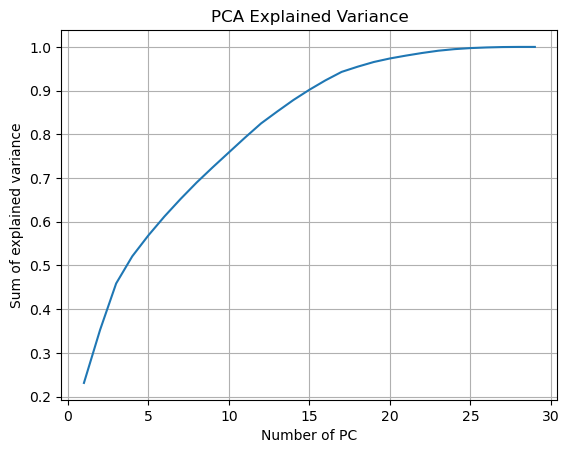

In [106]:
plt.plot(range(1, 30), explained_variance)
plt.xlabel('Number of PC')
plt.ylabel("Sum of explained variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

In [107]:
X_pca

array([[ 2.39281221,  0.16185574,  2.5944912 , ..., -0.93424677,
         0.89475671,  0.32928782],
       [-0.39752272, -2.33768002,  2.4547857 , ...,  1.35896346,
        -0.69427344, -0.07549484],
       [ 1.84901825, -1.647145  ,  1.00682738, ...,  0.25893111,
         0.44071791,  2.36350347],
       ...,
       [ 1.30549006,  0.25430292, -2.35775906, ..., -1.42127143,
        -0.11608306,  0.12225252],
       [ 1.43387891,  2.09088924, -1.63193262, ...,  0.41394537,
        -0.0949126 , -0.28746615],
       [ 0.99965749,  3.92322779, -0.29557363, ...,  0.75408552,
         0.33110752, -0.78136715]])

In [108]:
columns_pca = list(map(lambda i: f"PC{i+1}", range(16)))

# Create a DataFrame from PCA-transformed data
X_pca_df = pd.DataFrame(X_pca, columns=columns_pca)

# Show the first few rows
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,2.392812,0.161856,2.594491,0.093490,-0.536123,0.807502,-0.026069,-0.246794,0.273397,-1.773383,1.370521,0.855918,0.931194,-0.934247,0.894757,0.329288
1,-0.397523,-2.337680,2.454786,2.632744,-0.654189,-1.588575,2.640209,0.922010,-1.189539,-0.542998,-1.852927,0.287683,-0.236565,1.358963,-0.694273,-0.075495
2,1.849018,-1.647145,1.006827,-0.940973,-2.388166,-0.582336,-0.062262,-0.385864,0.431345,0.732308,0.106581,1.076880,0.016063,0.258931,0.440718,2.363503
3,3.440114,-0.928100,2.425612,0.476220,-0.993327,0.583893,0.367971,-0.924018,1.696551,-2.224151,1.019900,0.265625,1.107461,-0.672979,0.788443,0.828011
4,1.064947,-0.769017,4.187016,0.779977,-0.162803,0.483452,-0.011490,-1.047094,0.623533,-2.173687,2.240715,-0.395271,1.085993,0.544475,0.327397,-0.367383


## Categorical Columns

In [109]:
cat_cols

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'RecoveryStage', 'Rating',
       'Restructured'],
      dtype='object')

### Encoding Categorical columns using one-hot encoder


In [110]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
df_encoded_cat = encoder.fit_transform(df[cat_cols])

In [111]:
print(df_encoded_cat.shape)

(12707, 1465)


In [112]:
print("Feature Names:", df_encoded_cat)
type(df_encoded_cat)

Feature Names: [[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


numpy.ndarray

In [113]:
print("Feature Names:", encoder.get_feature_names_out())

Feature Names: ['NewCreditCustomer_No_prior_credit_history'
 'NewCreditCustomer_at_least_3_months_of_credit_history'
 'VerificationType_Income verified' ... 'Rating_HR'
 'Restructured_Structured' 'Restructured_Unstructured']


In [114]:
X_cat=pd.DataFrame(data = df_encoded_cat, columns = encoder.get_feature_names_out(cat_cols))
X_cat.head()

,NewCreditCustomer_No_prior_credit_history,NewCreditCustomer_at_least_3_months_of_credit_history,VerificationType_Income verified,VerificationType_Income_and_expenses_verified,VerificationType_Income_unverified,LanguageCode_English,LanguageCode_Estonian,LanguageCode_Finnish,LanguageCode_Russian,LanguageCode_Spanish,Gender_Male,Gender_Undefined,Gender_Woman,Country_EE,Country_ES,Country_FI,County_1,County_A CORUÑA,County_ALICANTE,County_ALMERÍA,County_ANDALUCÍA,County_ASTURIAS,County_Andalucía,County_BALEARES,County_BARCELONA,County_BIZKAIA,County_Barcelona,County_CADIZ,County_CANARIAS,County_CANTABRIA,County_CASTILLA Y LEÓN,County_CASTILLA-LA MANCHA,County_CATALUNYA,County_CATALUÑA,County_CIUDAD REAL,County_COMUNIDAD DE MADRID,County_COMUNIDAD VALENCIANA,County_CUENCA,County_Castilla y León,County_Castilla-La Mancha,County_Catalunya,County_Cataluña,County_Comunidad Valenciana,County_Comunidad de Madrid,County_CÁCERES,County_DEGERBY,County_ESPOO,County_ETELÄ-KARJALA,County_ETELÄ-POHJANMAA,County_ETELÄ-SAVO,County_ETELÄ-SUOMI,County_ETELÄSAVO,County_Extremadura,County_GALICIA,County_Galicia,County_HARJU,County_HARJUMAA,County_HIIU,County_HIIU MAAKOND,County_HIIUMAA MK.,County_Harjimaa,County_Harju,County_Harju maakond,County_Harjumaa,County_Hiiu maakond,County_Hiiumaa,County_Hiiumaa mk.,County_HÄME,County_IDA VIRU,County_IDA-VIRU,County_IDA-VIRUMA,County_IDA-VIRUMAA,County_ILLES BALEARS,County_INKOO,County_Ida-Viru maakond,County_Ida-Viru maakond,County_Ida-Virumaa,County_JAKOBSTAD,County_JÄRVA,County_JÄRVA MAAKOND,County_JÄRVAMAA,County_JÕGEVA,County_JÕGEVA MAAKOND,County_JÕGEVAMAA,"County_JÕGEVAMAA, PALAMUSE VALD",County_Järva,County_Järva maakond,County_Järva maakond,County_Järvamaa,County_Jõgeva,County_Jõgeva maakond,County_Jõgeva maakond,County_Jõgevamaa,County_KAINUU,County_KANTA-HÄME,County_KARKKILA,County_KESKI-POHJANMAA,County_KESKI-SUOMI,County_KIRKKONUMMI,County_KOTKA,County_KUOPIO,County_KYMENLAAKSO,County_KYMENLAKSO,County_Keski-Suomi,County_Kymenlakso,County_KÄMMENNIEMI,County_KÜLA,County_LAPPEENRANTA,County_LAPPI,County_LAS PALMAS,County_LÄNE-VIRUMAA,County_LÄNSI-SUOMI,County_LÄÄNE MAAKOND,County_LÄÄNE-SAARE,County_LÄÄNE-VIRU MAAKOND,County_LÄÄNE-VIRUMAA,County_LÄÄNEMAA,County_Lääne maakond,County_Lääne maakond,County_Lääne-Viru maakond,County_Lääne-Viru maakond,County_Lääne-Virumaa,County_Läänemaa,County_MADRID,County_MOS,County_MURCIA,County_MUSTASAARI,County_MYYRMÄKI,County_MÄRJAMAA,County_NAVARRA,County_NYLAND,County_OULU,County_PARNUMAAKOND,County_PIRKANMAA,County_POHJANMAA,County_POHJOIS-KARJALA,County_POHJOIS-POHJANMAA,County_POHJOIS-POHJANMAAN,County_POHJOIS-SAVO,County_POHJOIS-SAVON,County_POHJOISPOHJANMAA,County_PONTEVEDRA,County_Pirkanmaa,County_PÄIJÄT HÄME,County_PÄIJÄT-HÄME,County_PÄIJÄT-HÄMEEN MAAKUNTA,County_PÄRNU,County_PÄRNU LINN,County_PÄRNU MAAKOND,County_PÄRNUMAA,County_PÕLVA MAAKOND,County_PÕLVAMAA,County_Pärnu,County_Pärnu maakond,County_Pärnu linn,County_Pärnu maakond,County_Pärnumaa,County_Pärnumaakond,County_Põlva maakond,County_Põlva maakond,County_RAPLA,County_RAPLAMAA,County_REGIÓN DE MURCIA,County_Rapla,County_Rapla maakond,County_Rapla maakond,County_Raplamaa,County_Región de Murcia,County_SAARE,County_SAARE MAAKOND,County_SASTAMALA,County_SATAKUNTA,County_SEINÄJOKI,County_SEVILLA,County_SUOMI,County_SUURE-JAANI,County_Saare maakond,County_Saaremaa,County_TAMPERE,County_TARTU,County_TARTUMAA,County_TARTUMAAKOND,County_TARUMAA,County_TENERIFE,County_TYRNÄVÄ,County_Tartu maakond,County_Tartu maakond,County_Tartumaa,County_Tarumaa,County_UUDENMAAN,County_UUDIMAA,County_UUSIMAA,County_Uudimaa,County_Uusima,County_Uusimaa,County_VALENCIA,County_VALGA,County_VANTAA,County_VARSINAIS SUOMI,County_VARSINAIS-SUOMI,County_VASARAINEN,County_VILJANDI,County_VILJANDIMAA,County_VIZCAYA,County_Valga maakond,County_Valga maakond,County_Valgamaa,County_Varsinais-Suomi,County_Viljandi maakond,County_Viljandimaa,County_VÕRU,County_VÕRU MAAKOND,County_VÕRU VALD,County_VÕRUMAA,County_Võru maakond,County_Võ

In [115]:
y = df['defaulted']

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

log_mod = LogisticRegression(penalty='l1', solver = 'saga')
log_mod.fit(X_cat, y)
# Select features based on coefficients
selector = SelectFromModel(estimator = log_mod)
X_cat_cols = selector.fit_transform(X_cat, y)

In [117]:
print(X_cat_cols.shape)
X_cat_cols

(12707, 61)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
encoder.get_feature_names_out()

array(['NewCreditCustomer_No_prior_credit_history',
       'NewCreditCustomer_at_least_3_months_of_credit_history',
       'VerificationType_Income verified', ..., 'Rating_HR',
       'Restructured_Structured', 'Restructured_Unstructured'],
      dtype=object)

In [119]:
# Fitted model attributes
selector.get_support() 

array([False,  True,  True, ...,  True, False,  True])

In [120]:
selected_features = encoder.get_feature_names_out()[selector.get_support()]
print(selected_features.shape)
selected_features

(61,)


array(['NewCreditCustomer_at_least_3_months_of_credit_history',
       'VerificationType_Income verified',
       'VerificationType_Income_and_expenses_verified',
       'LanguageCode_English', 'LanguageCode_Estonian',
       'LanguageCode_Finnish', 'LanguageCode_Russian', 'Country_EE',
       'County_HARJU', 'County_IDA-VIRU', 'County_KYMENLAAKSO',
       'County_TARTU', 'County_Tartu maakond', 'County_UUSIMAA',
       'City_ESPOO', 'City_HAMINA', 'City_JAKKULA', 'City_JYVÄSKYLÄ',
       'City_KEHTNA VALD', 'City_KEMI', 'City_KIRKKONUMMI',
       'City_MUSTASAARI', 'City_SOMERO', 'City_VANTAA',
       'UseOfLoan_Health', 'UseOfLoan_Home_improvement',
       'UseOfLoan_Loan_consolidation', 'UseOfLoan_Not_set',
       'UseOfLoan_Other', 'UseOfLoan_Vehicle',
       'Education_Basic_education', 'Education_Higher_education',
       'Education_Secondary_education', 'MaritalStatus_Cohabitant',
       'MaritalStatus_Married', 'MaritalStatus_Not_specified',
       'EmploymentStatus_Entrepreneu

In [122]:
X_cat_cols_df = pd.DataFrame(data = X_cat_cols, columns = selected_features)
print(X_cat_cols_df.shape)
X_cat_cols_df.head()

(12707, 61)


,NewCreditCustomer_at_least_3_months_of_credit_history,VerificationType_Income verified,VerificationType_Income_and_expenses_verified,LanguageCode_English,LanguageCode_Estonian,LanguageCode_Finnish,LanguageCode_Russian,Country_EE,County_HARJU,County_IDA-VIRU,County_KYMENLAAKSO,County_TARTU,County_Tartu maakond,County_UUSIMAA,City_ESPOO,City_HAMINA,City_JAKKULA,City_JYVÄSKYLÄ,City_KEHTNA VALD,City_KEMI,City_KIRKKONUMMI,City_MUSTASAARI,City_SOMERO,City_VANTAA,UseOfLoan_Health,UseOfLoan_Home_improvement,UseOfLoan_Loan_consolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_Vehicle,Education_Basic_education,Education_Higher_education,Education_Secondary_education,MaritalStatus_Cohabitant,MaritalStatus_Married,MaritalStatus_Not_specified,EmploymentStatus_Entrepreneur,EmploymentStatus_Not_specified,EmploymentStatus_Retiree,EmploymentStatus_Self-employed,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Civil_service&military,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Finance_insurance,OccupationArea_Info_telecom,OccupationArea_Not_specified,OccupationArea_Other,OccupationArea_Retail_wholesale,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Tenant_pre-furnished_property,HomeOwnershipType_Tenant_unfurnished_property,RecoveryStage_Recovery,RecoveryStage_Unknown,Rating_AA,Rating_B,Rating_D,Rating_E,Rating_HR,Restructured_Unstructured
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Combining Both numerical and categorical features together

In [123]:
X_combined = pd.concat([X_pca_df, X_cat_cols_df], axis = 1)
print(X_combined.shape)
X_combined.head()

(12707, 77)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,NewCreditCustomer_at_least_3_months_of_credit_history,VerificationType_Income verified,VerificationType_Income_and_expenses_verified,LanguageCode_English,LanguageCode_Estonian,LanguageCode_Finnish,LanguageCode_Russian,Country_EE,County_HARJU,County_IDA-VIRU,County_KYMENLAAKSO,County_TARTU,County_Tartu maakond,County_UUSIMAA,City_ESPOO,City_HAMINA,City_JAKKULA,City_JYVÄSKYLÄ,City_KEHTNA VALD,City_KEMI,City_KIRKKONUMMI,City_MUSTASAARI,City_SOMERO,City_VANTAA,UseOfLoan_Health,UseOfLoan_Home_improvement,UseOfLoan_Loan_consolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_Vehicle,Education_Basic_education,Education_Higher_education,Education_Secondary_education,MaritalStatus_Cohabitant,MaritalStatus_Married,MaritalStatus_Not_specified,EmploymentStatus_Entrepreneur,EmploymentStatus_Not_specified,EmploymentStatus_Retiree,EmploymentStatus_Self-employed,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Civil_service&military,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Finance_insurance,OccupationArea_Info_telecom,OccupationArea_Not_specified,OccupationArea_Other,OccupationArea_Retail_wholesale,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Tenant_pre-furnished_property,HomeOwnershipType_Tenant_unfurnished_property,RecoveryStage_Recovery,RecoveryStage_Unknown,Rating_AA,Rating_B,Rating_D,Rating_E,Rating_HR,Restructured_Unstructured
0,2.392812,0.161856,2.594491,0.093490,-0.536123,0.807502,-0.026069,-0.246794,0.273397,-1.773383,1.370521,0.855918,0.931194,-0.934247,0.894757,0.329288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.397523,-2.337680,2.454786,2.632744,-0.654189,-1.588575,2.640209,0.922010,-1.189539,-0.542998,-1.852927,0.287683,-0.236565,1.358963,-0.694273,-0.075495,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.849018,-1.647145,1.006827,-0.940973,-2.388166,-0.582336,-0.062262,-0.385864,0.431345,0.732308,0.106581,1.076880,0.016063,0.258931,0.440718,2.363503,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.440114,-0.928100,2.425612,0.476220,-0.993327,0.583893,0.367971,-0.924018,1.696551,-2.224151,1.019900,0.265625,1.107461,-0.672979,0.788443,0.828011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.064947,-0.769017,4.187016,0.779977,-0.162803,0.483452,-0.011490,-1.047094,0.623533,-2.173687,2.240715,-0.395271,1.085993,0.544475,0.327397,-0.367383,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [124]:
X_combined["Default_Status"] = df["defaulted"]
print(f"Updated shape of X_combined: {X_combined.shape}")
X_combined.head(1)

Updated shape of X_combined: (12707, 78)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,NewCreditCustomer_at_least_3_months_of_credit_history,VerificationType_Income verified,VerificationType_Income_and_expenses_verified,LanguageCode_English,LanguageCode_Estonian,LanguageCode_Finnish,LanguageCode_Russian,Country_EE,County_HARJU,County_IDA-VIRU,County_KYMENLAAKSO,County_TARTU,County_Tartu maakond,County_UUSIMAA,City_ESPOO,City_HAMINA,City_JAKKULA,City_JYVÄSKYLÄ,City_KEHTNA VALD,City_KEMI,City_KIRKKONUMMI,City_MUSTASAARI,City_SOMERO,City_VANTAA,UseOfLoan_Health,UseOfLoan_Home_improvement,UseOfLoan_Loan_consolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_Vehicle,Education_Basic_education,Education_Higher_education,Education_Secondary_education,MaritalStatus_Cohabitant,MaritalStatus_Married,MaritalStatus_Not_specified,EmploymentStatus_Entrepreneur,EmploymentStatus_Not_specified,EmploymentStatus_Retiree,EmploymentStatus_Self-employed,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Civil_service&military,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Finance_insurance,OccupationArea_Info_telecom,OccupationArea_Not_specified,OccupationArea_Other,OccupationArea_Retail_wholesale,HomeOwnershipType_Mortgage,HomeOwnershipType_Other,HomeOwnershipType_Tenant_pre-furnished_property,HomeOwnershipType_Tenant_unfurnished_property,RecoveryStage_Recovery,RecoveryStage_Unknown,Rating_AA,Rating_B,Rating_D,Rating_E,Rating_HR,Restructured_Unstructured,Default_Status
0,2.392812,0.161856,2.594491,0.09349,-0.536123,0.807502,-0.026069,-0.246794,0.273397,-1.773383,1.370521,0.855918,0.931194,-0.934247,0.894757,0.329288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [125]:
X_combined.to_csv('Model_Building_data.csv', index=False)